# Kaggle Tunnel Data

Develop a Linear Regression model for Time Series Forecast over the tunnel dataset.

# Setup Notebook

## Import

In [9]:
# Import Standard Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression

# Import Package Modules
from src.general_utils.general_utils import read_configuration, read_data_from_config

## Plot Configurations

In [14]:
# Set Matplotlib defaults
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

## Define Configuration

In [2]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'linear_regression_config.yaml')

# Extract configuration variables
tunnel_dataset_config = config['tunnel_dataset_config']

[06/04/2024 20:15:18 - general_utils] INFO - read_configuration - Start
[06/04/2024 20:15:18 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/TimeWarpForecast/configuration/linear_regression_config.yaml
[06/04/2024 20:15:18 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/TimeWarpForecast/configuration/linear_regression_config.yaml read successfully
[06/04/2024 20:15:18 - general_utils] INFO - read_configuration - End


# Read Data

In [3]:
# Read data
tunnel_dataset = read_data_from_config(tunnel_dataset_config)

[06/04/2024 20:15:18 - general_utils] INFO - read_data_from_config - Start
[06/04/2024 20:15:18 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/04/2024 20:15:18 - general_utils] INFO - build_path_from_list - Start
[06/04/2024 20:15:18 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/04/2024 20:15:18 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/04/2024 20:15:18 - general_utils] INFO - build_path_from_list - End
[06/04/2024 20:15:18 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/tunnel.csv
[06/04/2024 20:15:18 - general_utils] INFO - read_data_from_config - Reading data
[06/04/2024 20:15:18 - general_utils] INFO - read_data_from_config - Successfully read data with 747 rows and 2 columns
[06/04/2024 20:15:18 - general_utils] INFO - read_data_from_config - End


# Model Time-step Based

## Data Preparation

### Time-step Feature

Time-step features are features we can derive directly from the time index. 
The most basic time-step feature is the **Time Dummy**, which counts off time steps in the series from beginning to end.

In [4]:
# Add the time-step feature
tunnel_dataset['Time'] = np.arange(len(tunnel_dataset))

In [5]:
tunnel_dataset

,Day,NumVehicles,Time
0,2003-11-01,103536,0
1,2003-11-02,92051,1
2,2003-11-03,100795,2
3,2003-11-04,102352,3
4,2003-11-05,106569,4
...,...,...,...
742,2005-11-12,104646,742
743,2005-11-13,94424,743
744,2005-11-14,112165,744
745,2005-11-15,114296,745


### Define Features & Labels

In [6]:
X = tunnel_dataset.loc[:, ['Time']]  # features
y = tunnel_dataset.loc[:, 'NumVehicles']  # target

## Model Training

In [7]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Inference

In [10]:
# Compute predictions
y_pred = pd.Series(model.predict(X), index=X.index)

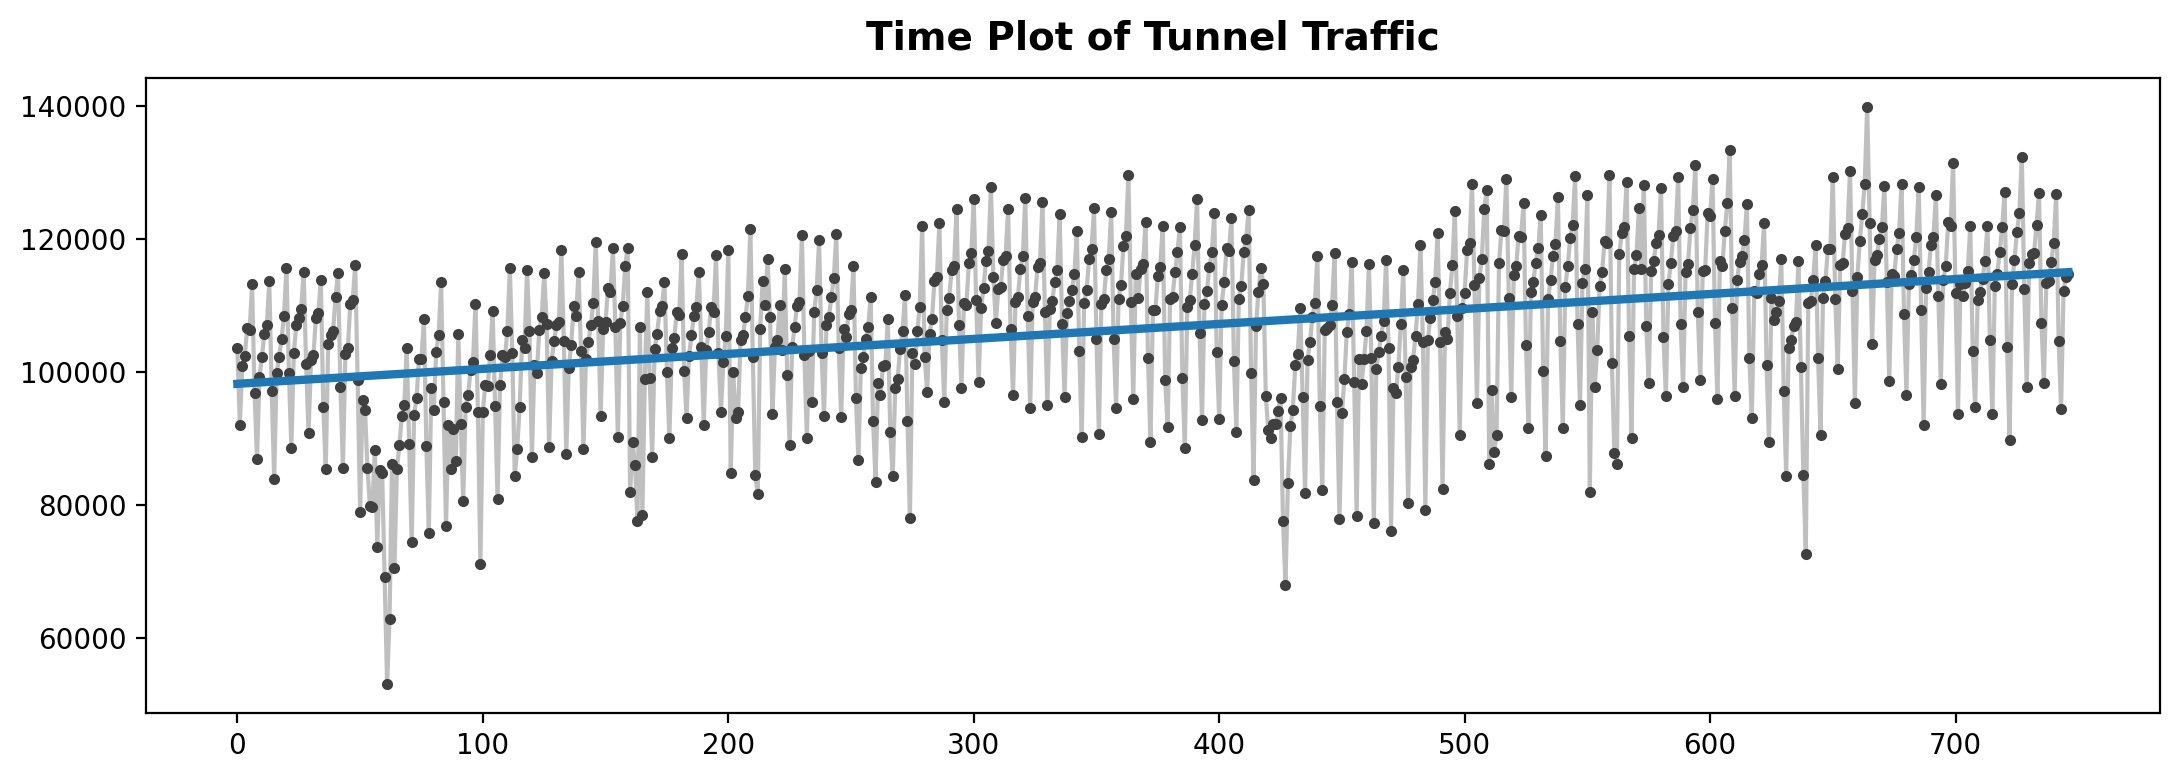

In [15]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');